In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
#print(iris_dataset.DESCR)

In [6]:
#iris_dataset['data'][:5]

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [8]:
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


In [9]:
df_iris =pd.DataFrame(X_train, columns=iris_dataset.feature_names)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f25a9ccfd30>,
      dtype=object)

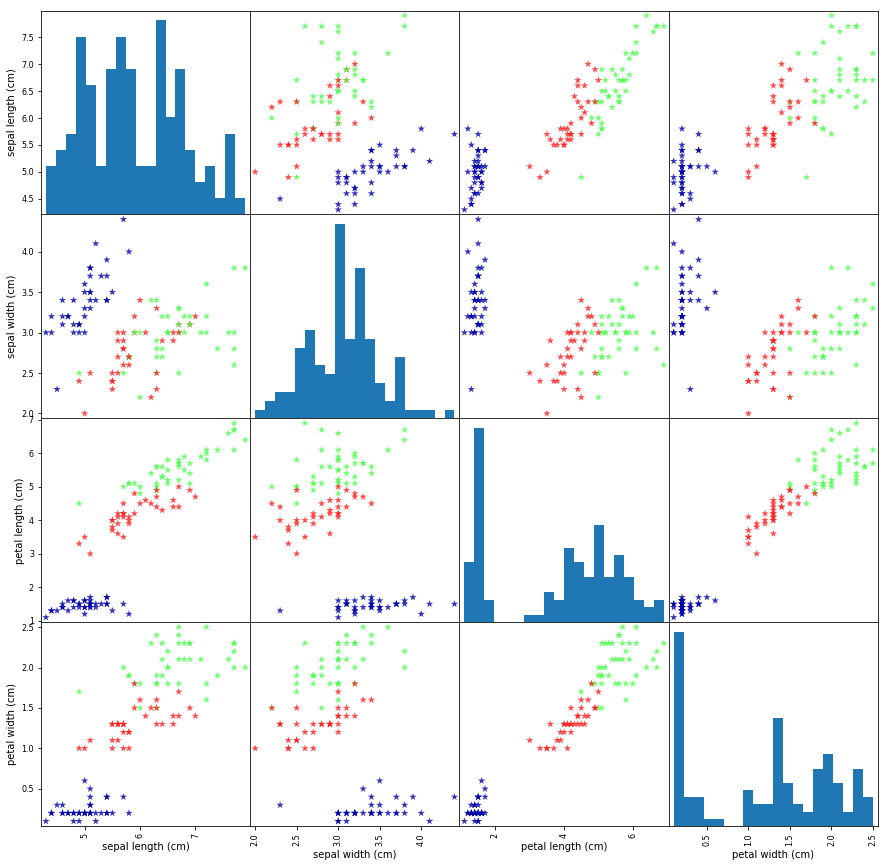

In [10]:
pd.plotting.scatter_matrix(df_iris, c=y_train, figsize=(15,15), marker='*', hist_kwds={'bins':20}, s=60, alpha=0.8, cmap=mglearn.cm3)

/home/adesope/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


Text(0, 0.5, 'Second feature')

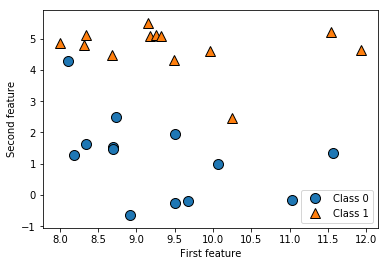

In [11]:
X,y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(['Class 0', 'Class 1'],loc=4)
plt.xlabel('First feature')
plt.ylabel('Second feature')

# wave dataset

In [12]:
from sklearn.linear_model import LinearRegression
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42)

In [13]:
lr = LinearRegression().fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)
print(lr.score(X_train,y_train)) #performance on train set
print(lr.score(X_test,y_test))  #performance on test set

[0.39390555]
-0.03180434302675976
0.6700890315075756
0.65933685968637


# Boston dataset

In [14]:
X,y = mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=0)

In [15]:
lr = LinearRegression().fit(X_train,y_train)
#print(lr.coef_)
#print(lr.intercept_)
print(lr.score(X_train,y_train)) #performance on train set
print(lr.score(X_test,y_test))  #performance on test set

0.9520519609032729
0.6074721959665842


In [16]:
#Ridge regression alpha=1 (default)
from sklearn.linear_model import Ridge
rg_1 = Ridge().fit(X_train,y_train)
print(rg_1.score(X_train,y_train)) #performance on train set
print(rg_1.score(X_test,y_test))  #performance on test set

0.885796658517094
0.7527683481744752


In [17]:
#Ridge regression with alpha=10
from sklearn.linear_model import Ridge
rg10 = Ridge(alpha=10).fit(X_train,y_train)
print(rg10.score(X_train,y_train)) #performance on train set
print(rg10.score(X_test,y_test))  #performance on test set

0.7882787115369614
0.6359411489177309


In [18]:
#Ridge regression with alpha=0.1
from sklearn.linear_model import Ridge
rg01 = Ridge(alpha=0.1).fit(X_train,y_train)
print(rg01.score(X_train,y_train)) #performance on train set
print(rg01.score(X_test,y_test))  #performance on test set

0.9282273685001982
0.7722067936479957


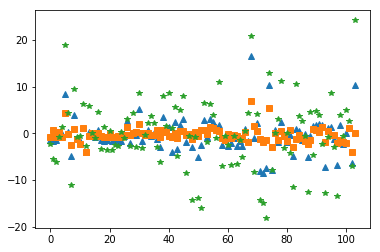

In [19]:
plt.plot(rg_1.coef_,'^',label='Ridge alpha=1')
plt.plot(rg10.coef_,'s',label='Ridge alpha=10')
plt.plot(rg01.coef_,'*',label='Ridge alpha=0.1')
#plt.plot(lr.coef_,'o',label='Linear regression')

In [31]:
#Ridge regression with alpha=10
from sklearn.linear_model import Ridge
rg10 = Ridge(alpha=10).fit(X_train,y_train)
print('Train set performance: {:.2f}'.format(rg10.score(X_train,y_train))) 
print('Test set performance: {:.2f}'.format(rg10.score(X_test,y_test)))

Train set performance: 0.79
Test set performance: 0.64


In [41]:
#Lasso regression with alpha=1.0 default
from sklearn.linear_model import Lasso
Ls = Lasso().fit(X_train,y_train)
print('Train set performance: {:.2f}'.format(Ls.score(X_train,y_train))) 
print('Test set performance: {:.2f}'.format(Ls.score(X_test,y_test)))
print('Number of features used: {}'.format(np.sum(Ls.coef_!=0)))

Train set performance: 0.29
Test set performance: 0.21
Number of features used: 4


In [39]:
#Lasso regression with alpha=0.01
from sklearn.linear_model import Lasso
Ls = Lasso(alpha=0.01, max_iter=100000).fit(X_train,y_train)
print('Train set performance: {:.2f}'.format(Ls.score(X_train,y_train))) 
print('Test set performance: {:.2f}'.format(Ls.score(X_test,y_test)))
print('Number of features used: {}'.format(np.sum(Ls.coef_!=0)))

Train set performance: 0.90
Test set performance: 0.77
Number of features used: 33


In [42]:
#Lasso regression with alpha=0.0001
from sklearn.linear_model import Lasso
Ls = Lasso(alpha=0.0001, max_iter=100000).fit(X_train,y_train)
print('Train set performance: {:.2f}'.format(Ls.score(X_train,y_train))) 
print('Test set performance: {:.2f}'.format(Ls.score(X_test,y_test)))
print('Number of features used: {}'.format(np.sum(Ls.coef_!=0)))

Train set performance: 0.95
Test set performance: 0.64
Number of features used: 96


# Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


cancer = load_breast_cancer()

X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, stratify= cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)

print('Accuracy on training set: {:.2f}'.format(tree.score(X_train,y_train)))
print('Accuracy on training set: {:.2f}'.format(tree.score(X_test,y_test)))

Accuracy on training set: 1.00
Accuracy on training set: 0.94


In [16]:
# tuning the max_depth

tree = DecisionTreeClassifier(max_depth= 4, random_state=0)
tree.fit(X_train,y_train)

print(tree.fit(X_train,y_train), '\n')

print('Accuracy on training set: {:.2f}'.format(tree.score(X_train,y_train)))
print('Accuracy on training set: {:.2f}'.format(tree.score(X_test,y_test)))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best') 

Accuracy on training set: 0.99
Accuracy on training set: 0.95


In [19]:
# from sklearn.tree import export_graphviz
# export_graphviz(tree, out_file='tree.dot', class_names=['malignant', 'benign'], feature_names=cancer.feature_names, impurity=False, filled=True)

# import graphviz
# with open('tree.dot') as f:
#     dot_graph = f.read()
# display(graphviz.Source(dot_graph))    

In [30]:
print('Feature importances:\n{}'.format(pd.DataFrame(tree.feature_importances_,cancer.feature_names)))

Feature importances:
                                0
mean radius              0.000000
mean texture             0.000000
mean perimeter           0.000000
mean area                0.000000
mean smoothness          0.000000
mean compactness         0.000000
mean concavity           0.000000
mean concave points      0.000000
mean symmetry            0.000000
mean fractal dimension   0.000000
radius error             0.010197
texture error            0.048398
perimeter error          0.000000
area error               0.000000
smoothness error         0.002416
compactness error        0.000000
concavity error          0.000000
concave points error     0.000000
symmetry error           0.000000
fractal dimension error  0.000000
worst radius             0.726829
worst texture            0.045816
worst perimeter          0.000000
worst area               0.000000
worst smoothness         0.014158
worst compactness        0.000000
worst concavity          0.018188
worst concave points     0.

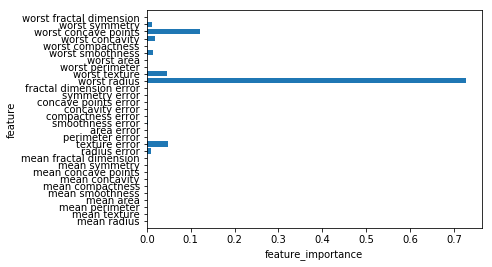

In [46]:
def plot_feature(model):
    n_feature= cancer.data.shape[1]
    plt.barh(range(n_feature), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_feature), cancer.feature_names)
    plt.xlabel('feature_importance')
    plt.ylabel('feature')
    plt.ylim(-1,n_feature)

plot_feature(tree)

# Clustering

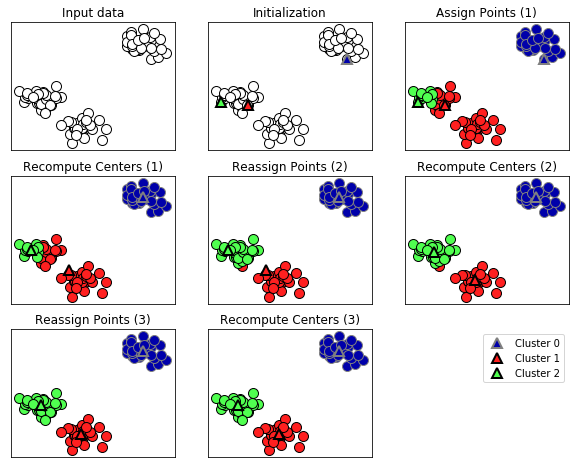

In [2]:
# K-Means

mglearn.plots.plot_kmeans_algorithm()

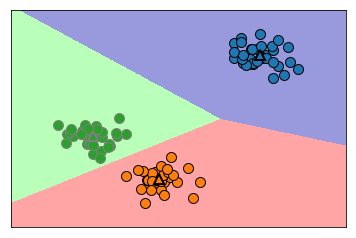

In [3]:
mglearn.plots.plot_kmeans_boundaries()

In [14]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X,y = make_blobs(random_state=1)
k_model = KMeans(n_clusters=3).fit(X)

print('Cluster membership: {}\n'.format(k_model.labels_))

print(k_model.predict(X))

# l = k_model.labels_
# v = k_model.predict(X)

# l==v

Cluster membership: [1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]
